# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования:

1. Определить рыночную стоимоть объектов недвижимости
2. Построить автоматизированную систему, которая отследит аномалиии мошенническую деятельность
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

Ход исследования:

Данные о недвижимости хранятся в файле *'/datasets/real_estate_data.csv'*. Необходимо определить какие данные в нём содержаться. Необходимо сделать исследование данных. На этапе предобработки будут отработаны все необходимые пропуски, ошибки, неточности в данных. После будут созданые новые столбцы, необходимые для последующего анализа данных. Завершающим этапом будет исследовательский анализ данных.

Задачи:

1. Исследование данных.

2. Предобработка данных.

3. Добавление новых столбцов.
  - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
  - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
  - месяц публикации объявления;
  - год публикации объявления;
  - тип этажа квартиры (значения — «первый», «последний», «другой»);
  - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
  
4. Провести исследовательский анализ данных: 

 **Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из этих параметров:**
  - общая площадь;
  - жилая площадь;
  - площадь кухни
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка
  
 **Изучить как быстро продавались квартиры.**
 - Построить гистограмму.
 - Посчитать среднее и медиану.
 - Описать сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.

 **Проанализировать какие факторы больше всего влияют на общую (полную) стоимость объекта.**
 - Изучите, зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).
 - построить графики, которые покажут зависимость цены от указанных выше параметров.
 
 **Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

 **Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.**

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

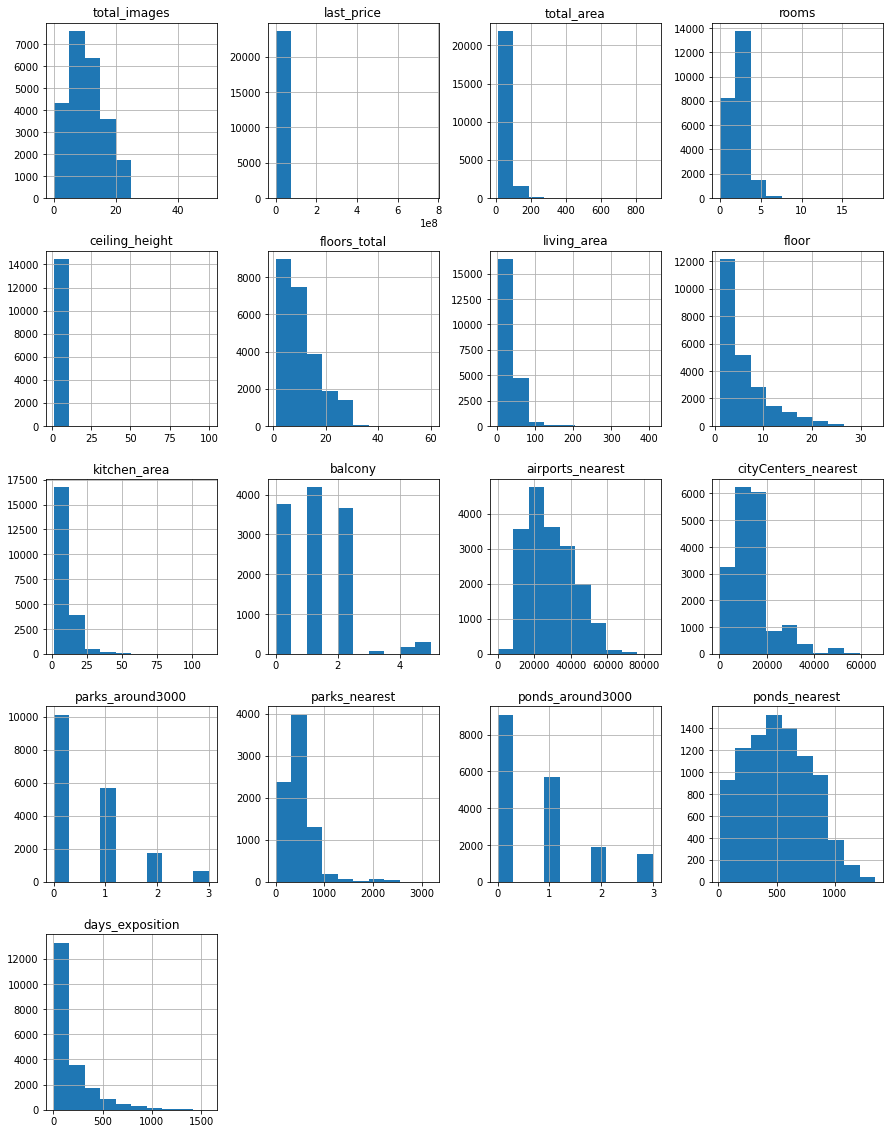

In [2]:
#Открытие файла
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

#Построим гистограммы по данным
data.hist(figsize=(15,20))
plt.show()

В данных 23699 строк, однако есть проблемы с типом данных и их качеством:

1. ceiling_height - присутствуют нулевые значения
2. floors_total - значение object, а должно быть int64 + присутствуют нулевые значения
3. living_area - присутствуют нулевые значения
4. is_apartment - значение object, а должно быть bool + присутствуют нулевые значения
5. kitchen_area - присутствуют нулевые значения
6. balcony - присутствуют нулевые значения
7. locality_name - присутствуют нулевые значения
8. airports_nearest - присутствуют нулевые значения
9. cityCenters_nearest - присутствуют нулевые значения
10. parks_around3000 -значение object, а должно быть int64 + присутствуют нулевые значения
11. parks_nearest - присутствуют нулевые значения
12. ponds_around3000 - значение object, а должно быть int64 + присутствуют нулевые значения
13. ponds_nearest - присутствуют нулевые значения
14. days_exposition - присутствуют нулевые значения
15. first_day_exposition - значение object, а должно быть datetime

### Предобработка данных

Распечатаем таблицу data, чтобы в процессе предобработки можно было удобно на нее ориентироваться

In [3]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Посмотрим в каких столбцах есть пропущенные значения:

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заменим типы данных и прорабатаем пропущенные значения:**

In [5]:
#Посчитаем сколько пропущенных значений по общему количеству этажей
data['floors_total'].isna().sum()
#ошибки во floors_total  всего-лишь 86, можно убрать строки с пропущенными значениями, сильно на вид они не повляют
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

#Пропущенные значения для балконов скорей всего свидетельствуют о том, что балкона просто нет - поэтому заполним значения на 0
data['balcony'] = data['balcony'].fillna(0).astype('int')

data['parks_around3000'].isna().sum()
#Пропущенных значений 5508, многовато, но следуя логике примем это число за 0
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

data['ponds_around3000'].isna().sum()
#Для прудов такое же количество пропусков
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

#Данные по first_day_exspostion приводим в формат  datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

#Приведем все столбцы к нижнему регистру и змеиному стилю
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'},inplace=True)

#Dсе пропущенные значения заменим на False
data['is_apartment'] = data['is_apartment'].fillna(False)

#Пропуски в locality_name заменим н

Изучим Ceiling_height:

In [6]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Слишком много пропущенных значений чтобы их убирать, поэтому пропущенные значения приравняем к медиане.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Посмотрим какие вообще есть данные по высоте потолков:

In [8]:
unique_ceiling_height = data['ceiling_height'].unique()
sorted_unique_ceiling_height = sorted(unique_ceiling_height, reverse=True)
sorted_unique_ceiling_height

[100.0,
 32.0,
 27.5,
 27.0,
 26.0,
 25.0,
 24.0,
 22.6,
 20.0,
 14.0,
 10.3,
 8.3,
 8.0,
 6.0,
 5.8,
 5.6,
 5.5,
 5.3,
 5.2,
 5.0,
 4.9,
 4.8,
 4.7,
 4.65,
 4.5,
 4.45,
 4.4,
 4.37,
 4.3,
 4.25,
 4.2,
 4.19,
 4.15,
 4.14,
 4.1,
 4.06,
 4.0,
 3.98,
 3.95,
 3.93,
 3.9,
 3.88,
 3.87,
 3.86,
 3.85,
 3.84,
 3.83,
 3.82,
 3.8,
 3.78,
 3.76,
 3.75,
 3.7,
 3.69,
 3.68,
 3.67,
 3.66,
 3.65,
 3.63,
 3.62,
 3.6,
 3.59,
 3.58,
 3.57,
 3.56,
 3.55,
 3.54,
 3.53,
 3.52,
 3.51,
 3.5,
 3.49,
 3.48,
 3.47,
 3.46,
 3.45,
 3.44,
 3.43,
 3.42,
 3.4,
 3.39,
 3.38,
 3.37,
 3.36,
 3.35,
 3.34,
 3.33,
 3.32,
 3.31,
 3.3,
 3.29,
 3.28,
 3.27,
 3.26,
 3.25,
 3.24,
 3.23,
 3.22,
 3.21,
 3.2,
 3.18,
 3.17,
 3.16,
 3.15,
 3.14,
 3.13,
 3.12,
 3.11,
 3.1,
 3.09,
 3.08,
 3.07,
 3.06,
 3.05,
 3.04,
 3.03,
 3.02,
 3.01,
 3.0,
 2.99,
 2.98,
 2.97,
 2.96,
 2.95,
 2.94,
 2.93,
 2.92,
 2.91,
 2.9,
 2.89,
 2.88,
 2.87,
 2.86,
 2.85,
 2.84,
 2.83,
 2.82,
 2.81,
 2.8,
 2.79,
 2.78,
 2.77,
 2.76,
 2.75,
 2.74,
 2.73,
 2.72,


В данных присутствуют значения от 10 до 100 метров, это явная ошибка поэтому значения выше 14 метров поделим на 10.

In [9]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if x > 14 else x)

In [10]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

Пропуски остаь в следующих столбцах:
- living_area - 1870: пропусков также мало можно заменить медианным значением
- kitchen_area -2231: 
- locality_name - 48
- airports_nearest - 5532
- city_centers_nearest - 5509
- parks - nearest - 15568
- ponds_nearest - 14552
- days_exposition - 3172

Изучим locality_name:

In [12]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Поработаем с неявнми дубликатми:

In [13]:
#приведём все данные к нижнему регистру:
data['locality_name'] = data['locality_name'].str.lower()

#посёлок Пансионат Зелёный Бор' и  поселок Пансионат Зелёный Бор' одно и то же, заменим букву ё на е:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

#заменим значение посёлок на однотипное:
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

In [14]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

322


array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

Было 365 уникальных значений стало 322.

In [15]:
data['rooms'].value_counts()

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Присутствуют выбросы, но обратим внимание на 0 комнатные квартиры, однако их не так много и их можно отбросить.

**Уберем выбросы из наших данных:**

In [16]:
#Квартиры больше 8 комнат редкость и могу исказить анализ:
data = data.query('rooms <8')

**Проверим явные дубликаты**

In [17]:
data.duplicated().sum()

0

In [18]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23582.000000,2.358200e+04,23582.000000,23582.000000,23582.000000,23582.000000,21713.000000,23582.000000,21355.000000,23582.000000,18050.000000,18073.000000,23582.000000,8019.000000,23582.000000,9044.000000,20417.000000
mean,9.875795,6.481122e+06,60.018927,2.060724,2.698371,10.680095,34.244473,5.879272,10.540575,0.593673,28797.361330,14198.054501,0.467518,490.629630,0.589857,518.452234,180.648381
std,5.681715,1.041939e+07,34.184049,1.035215,0.253076,6.597854,21.097711,4.873948,5.805604,0.960714,12631.697685,8612.081084,0.747346,341.375592,0.883942,277.914603,219.356165
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18573.250000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.630000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26753.500000,13104.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37263.500000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,631.200000,7.000000,14.000000,60.000000,347.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По результатам предобработки данных была проделана следующая работа:

    - отработаны пропущенные значения;
    - столбцы приведены к соответствующим типам данных;
    - отработаны выбросы и аномалии в данных;
    - произведена проверка на явные дубликаты;
    - произведена проверка и замена неявных дубликатов.
    
Потери при предобработке данных небольшие. Качество исходных данных можно считать высоким.
Можно переходить к следующему этапу анализа.

### Посчитайте и добавьте в таблицу новые столбцы

Задачи для данного этапа:
  - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
  - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
  - месяц публикации объявления;
  - год публикации объявления;
  - тип этажа квартиры (значения — «первый», «последний», «другой»);
  - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

**Цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)**

In [19]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].round(decimals=2)

**Добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [20]:
data['day_exposition'] = data['first_day_exposition'].dt.day_name()

**Добавим месяц публикации объявления**

In [21]:
data['month_exposition'] = data['first_day_exposition'].dt.month_name()

**Добавим год публикации объявления**

In [22]:
data['year_exposition'] = data['first_day_exposition'].dt.year

**Построим функцию для определения типа этажа квартиры (значения — «первый», «последний», «другой»)**

In [23]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

#Применим функцию для объявления нового столбца
data['floor_category'] = data.apply(floor_category, axis = 1)

**Добавим столбец с расстояним до центра города в километрах.**

In [24]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

Исходя из графика можно заметить, что цена резко снижается по мере удаленности в пределах 3 км от центра. Два пиковых значения за центром связаны скорей всего с благоприятными густонаселенными районами, которые не входят в центр. Например "Черная речка" статусный район расположенный за центром. Плюс Санкт-Петербург не Москва с ярко выраженным центром.

По результатам данного этапа была проделана следующая работа:

    - добавлен столбец с ценой за квадратный метр;
    - добавлены столбцы для дня, месяца, года продажи;
    - построили функцию для категоризации этажей;
    - добавлены столбец с расстоянием в километрах до центра.
    
Можно приступить к исследовательскому анализу данных.

### Проведите исследовательский анализ данных

**Задачи:**

**4.1 Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из этих параметров:**
  - общая площадь;
  - жилая площадь;
  - площадь кухни
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка
  
**4.2 Изучить как быстро продавались квартиры.**
 - Построить гистограмму.
 - Посчитать среднее и медиану.
 - Описать сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.

**4.3 Проанализировать какие факторы больше всего влияют на общую (полную) стоимость объекта.**
 - Изучите, зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).
 - построить графики, которые покажут зависимость цены от указанных выше параметров.
 
**4.4 Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

**4.5 Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.**

**4.1 Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из этих параметров:**
  - общая площадь;
  - жилая площадь;
  - площадь кухни
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка

*Проанализируем общую площадь.*

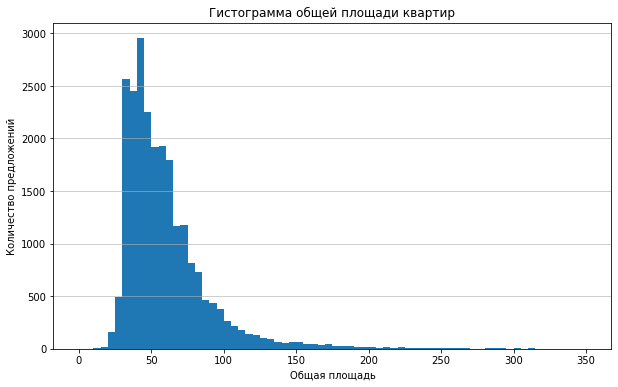

count    23582.000000
mean        60.018927
std         34.184049
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        631.200000
Name: total_area, dtype: float64

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(data['total_area'], bins=70, range=(0,350))
plt.title('Гистограмма общей площади квартир')
plt.xlabel('Общая площадь')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()
data['total_area'].describe()

Средний размер квартиры 60 кв. м., скорей всего это 2-комнатные квартиры, после идет резкое снижение. Соответственно основную массу предложений составляют 1-2 комнатные квартиры.

*Проанализируем жилую площадь*

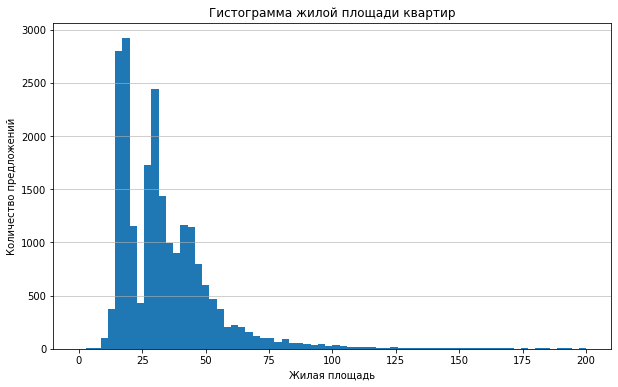

count    21713.000000
mean        34.244473
std         21.097711
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(data['living_area'], bins=70, range=(0,200))
plt.title('Гистограмма жилой площади квартир')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()
data['living_area'].describe()

С жилой площадью ситуация выглядит гораздо интереснее. Часто на размер жилой площади влияют балконы так как в старых домах они практически везде присутствуют и это конечно отъедает часть площади квартиры

*Проанализируем площадь кухни*

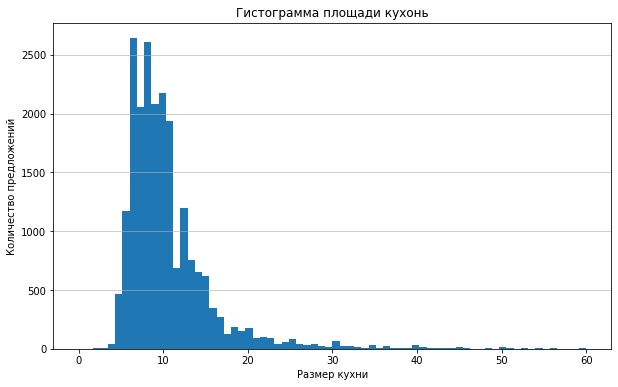

count    21355.000000
mean        10.540575
std          5.805604
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(data['kitchen_area'], bins=70, range=(0,60))
plt.title('Гистограмма площади кухонь')
plt.xlabel('Размер кухни')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()
data['kitchen_area'].describe()

Здесь как и с жилой площадью присутствуют два пика, по 1-комнатными квартирам и 2-комнатным.

*Проанализируем цену объекта*

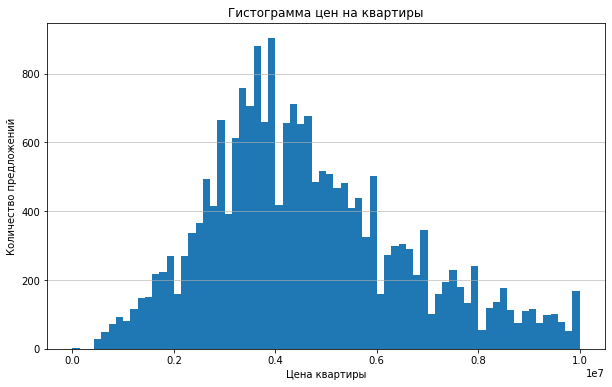

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data['last_price'], bins=70, range=(0, 10000000))  # Исправленная строка
plt.title('Гистограмма цен на квартиры')
plt.xlabel('Цена квартиры')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()

Средняя стоимость квартир 6,5 миллионов рублей. Можно предположить что средний размер квартиры 60 кв. метров, речь идет о 2-комнатных квартирах

*Проанализируем количество комнат в квартирах*

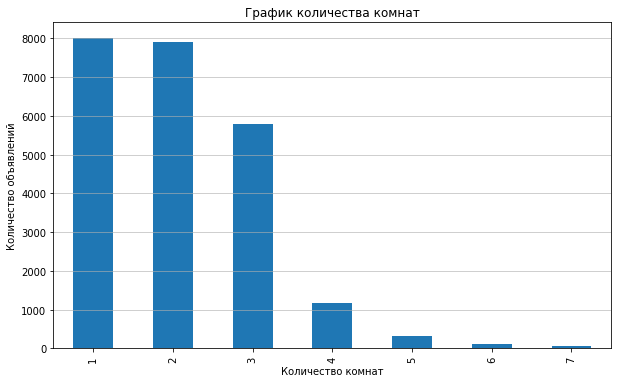

count    23582.000000
mean         2.060724
std          1.035215
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [29]:
filtered_data = data[(data['rooms'] >= 1) & (data['rooms'] <= 7)]

plt.figure(figsize=(10, 6))

room_counts = filtered_data['rooms'].value_counts().sort_index()

# Постройте столбчатую диаграмму
room_counts.plot(kind='bar')

plt.title('График количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', alpha=0.75)

plt.show()

data['rooms'].describe()

Преобладающее число на рынке квартир как и ожидалось 1,2 комнатные квартиры, однако 3-комнатные квартиры.

Проверим есть ли зависимость между ценой квадратной метра и количеством комнат.

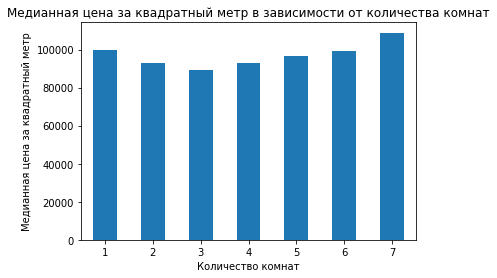

                mean  count      median
rooms                                  
7      163569.923559     59  108827.090
1      100790.449683   8015  100000.000
6      140639.794327    104   99391.205
5      126890.565046    325   96551.720
2       95458.758099   7913   92777.780
4      110371.149652   1177   92666.670
3       97123.259506   5795   88983.050
Корреляция между количеством комнат и ценой за квадратный метр: 0.05


In [30]:
#Создадим сводную таблицу о комнатах:
rooms_pivot = data.pivot_table(index='rooms', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
rooms_pivot.columns = ['mean', 'count', 'median']

#Оставим те строки, где 'count' больше 50 и строим гистограмму для 'median'
filtered_rooms_pivot = rooms_pivot.query('count > 50 and rooms > 0')
filtered_rooms_pivot['median'].plot(kind='bar', rot=0)

# Сортируем данные по убыванию медианы
sorted_filtered_pivot = filtered_rooms_pivot.sort_values('median', ascending=False)

plt.title('Медианная цена за квадратный метр в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена за квадратный метр')
plt.show()

print(sorted_filtered_pivot)

# Вычислим корреляцию между количеством комнат и ценой за квадратный метр
correlation = data['rooms'].corr(data['price_per_square_meter'])
print(f'Корреляция между количеством комнат и ценой за квадратный метр: {correlation:.2f}')

Преобладающее число на рынке квартир как и ожидалось 1,2 комнатные квартиры, однако 3-комнатные квартиры.

*Проанализируем высоту потолков*

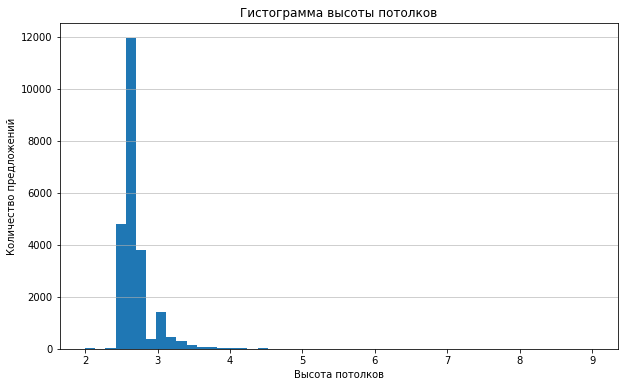

count    23582.000000
mean         2.698371
std          0.253076
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(data['ceiling_height'], bins=50, range=(2, 9))  # Исправленная строка
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()

data['ceiling_height'].describe()

Средняя высота потолков 2.69

*Проанализируем категории этажа*

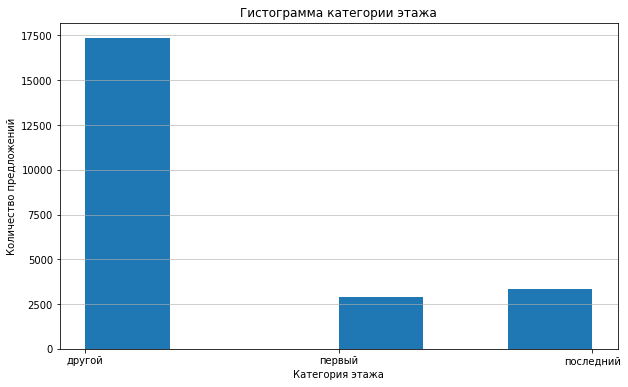

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(data['floor_category'], bins=6)  # Исправленная строка
plt.title('Гистограмма категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()

Как и следовало ожидать этажи расположеннные не на первом и не на последнем этажах стоят дороже и их больше, однако последние этажи дороже чем первые, что тоже логично потому что ниже риск краж, но и у последнего этажа есть минусы, например может протекать крыша.

*Проанализируем общее количество этажей в доме*

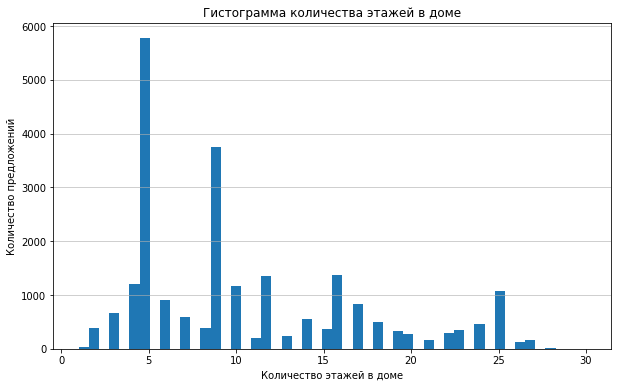

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(data['floors_total'], bins=50, range=(1, 30))
plt.title('Гистограмма количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()

Основную массу составляют 5 этажные дома, неудивительно, типовая планировка, также много 8-этажных домов, они расположены в основном в центре Санкт-Петербурга.

*Проанализируем расстояние до центра города в метрах*

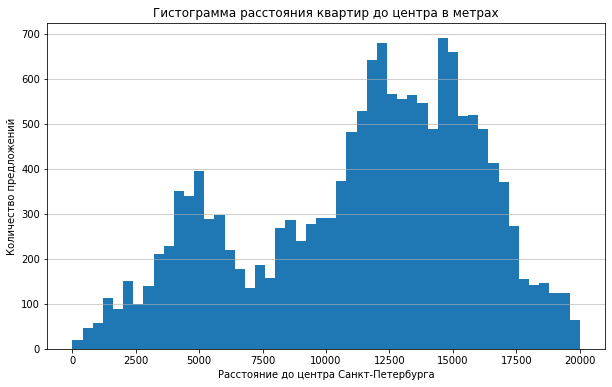

count    18073.000000
mean     14198.054501
std       8612.081084
min        181.000000
25%       9238.000000
50%      13104.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(data['city_centers_nearest'], bins=50, range=(1, 20000))
plt.title('Гистограмма расстояния квартир до центра в метрах')
plt.xlabel('Расстояние до центра Санкт-Петербурга')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()
data['city_centers_nearest'].describe()

Большинство квартир располагаются от 10 до 15 км от центра. Предлжений в центре оказывается не так много в сравнении с общей выборкой

*Проанализируем расстояние до ближайшего парка*

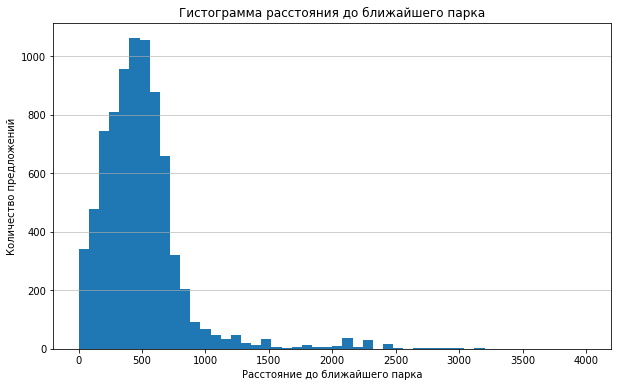

count    8019.000000
mean      490.629630
std       341.375592
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(data['parks_nearest'], bins=50, range=(1, 4000))
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()
data['parks_nearest'].describe()

В основном парки расположены в пределах 500 метров, а подавляющее большинстве в пределах километра

**4.2 Изучить как быстро продавались квартиры.**
 - Построить гистограмму.
 - Посчитать среднее и медиану.
 - Описать сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.

*Построим гистограмму*

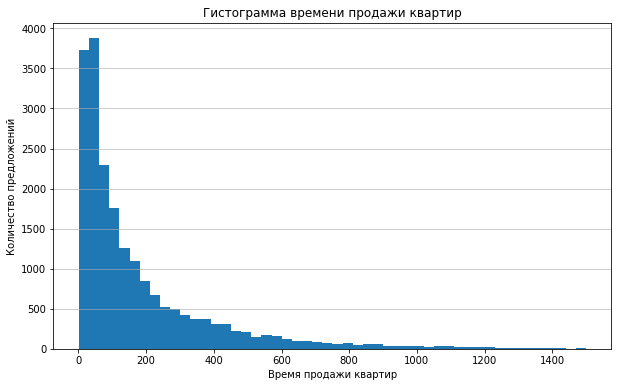

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(data['days_exposition'], bins=50, range=(1, 1500))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Время продажи квартир')
plt.ylabel('Количество предложений')
plt.grid(axis='y', alpha=0.75)
plt.show()

*Посчитаем среднее и медиану*

In [37]:
print(data['days_exposition'].median())
data['days_exposition'].mean()

95.0


180.64838125091836

*Опишем сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими:*

In [38]:
data['days_exposition'].describe()

count    20417.000000
mean       180.648381
std        219.356165
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры подаются 180 дней. Быстрыми продажами можно считать те, что продавались за 45 дней, а за 230 дней можно считать долгими продажами, скорей всего у Яндекс.Недвижимости есть ограничение на время отображения объявления по умолчанию. Судя по гистограмме квартиры продаются в основном менее чем за 3 месяца.

**4.3 Проанализировать какие факторы больше всего влияют на общую (полную) стоимость объекта.**
 
 Изучите, зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).
 
 построить графики, которые покажут зависимость цены от указанных выше параметров.

*Изучим зависит ли стоимость объекта от общей площади:*

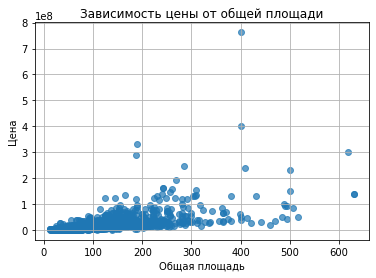

Корреляция между общей площадью и ценой: 0.64


In [39]:
plt.scatter(data['total_area'], data['last_price'], alpha=0.7)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.grid(True)

plt.show()
correlation = data['total_area'].corr(data['last_price'])
print(f'Корреляция между общей площадью и ценой: {correlation:.2f}')

Корелляция в 0.64 свидетельствует о высокой связи между ценой и метражом квартиры.

*Изучим зависит ли стоимость объекта от жилой площади:*

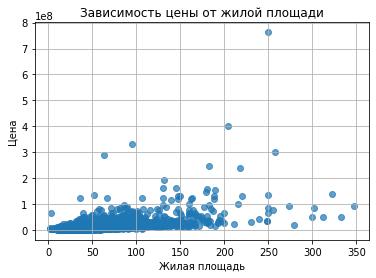

Корреляция между жилой площадью и ценой объекта: 0.55


In [40]:
plt.scatter(data['living_area'], data['last_price'], alpha=0.7)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.grid(True)

plt.show()
correlation = data['living_area'].corr(data['last_price'])
print(f'Корреляция между жилой площадью и ценой объекта: {correlation:.2f}')

Корелляция меньше если сравнивать с общей площадью однако она существенна

*Изучим зависит ли стоимость объекта от площади кухни:*

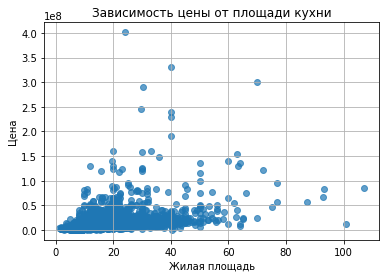

Корреляция между площадью кухни и ценой объекта: 0.51


In [41]:
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.7)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.grid(True)

plt.show()
correlation = data['kitchen_area'].corr(data['last_price'])
print(f'Корреляция между площадью кухни и ценой объекта: {correlation:.2f}')

Интересно что площадь кухни влияет на цену объекта почти также как и жилая площадь

*Изучим зависит ли стоимость объекта от количества комнат:*

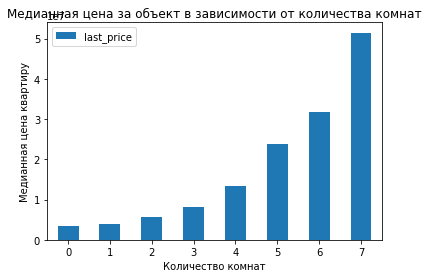

   rooms    last_price
0      0  3.344493e+06
1      1  3.835157e+06
2      2  5.588244e+06
3      3  8.172670e+06
4      4  1.340960e+07
5      5  2.379830e+07
6      6  3.188004e+07
7      7  5.147007e+07
Корреляция между количеством комнат и ценой зак квартиру: 0.92


In [42]:
#Создадим сводную таблицу о комнатах:
rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
rooms_pivot = rooms_pivot.reset_index()
rooms_pivot.plot(x='rooms', y='last_price', kind='bar', rot=0)

plt.title('Медианная цена за объект в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена квартиру')
plt.show()

print(rooms_pivot)

# Вычислим корреляцию между количеством комнат и ценой за квартиру
correlation = rooms_pivot['rooms'].corr(rooms_pivot['last_price'])
print(f'Корреляция между количеством комнат и ценой зак квартиру: {correlation:.2f}')

Очевидно что от количества комнат зависит и цена квартиры, корелляция приближена 0,92

*Изучим зависит ли стоимость объекта от этажа квартиры:*

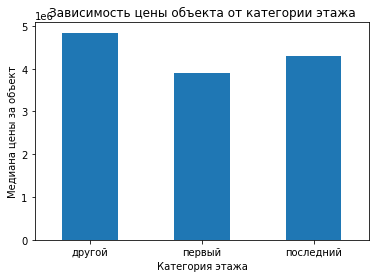

                        Mean  count     median
floor_category                                
другой          6.647414e+06  17348  4840000.0
первый          4.740683e+06   2909  3900000.0
последний       7.136189e+06   3325  4300000.0


In [43]:
# Создаем сводную таблицу для данных о категории этажа
floor_category_price = data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
floor_category_price.columns = ['Mean', 'count', 'median']

# Строим столбчатую диаграмму для 'Медианы'
floor_category_price.plot(kind='bar', y='median', legend=False, rot=0)

plt.title('Зависимость цены объекта от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Медиана цены за объект')
plt.show()

print(floor_category_price)

Квартиры на первых этажах самые дешевые так как: выше риск краж, часто плохой вид из окна
Квартиры на последних этажах тоже дешевле чем на других так как: риск того что крыша может протекать.
Квартиры на других этажах как и следовало ожидать дороже.

*Изучим зависит ли стоимость объекта от даты размещения (день недели, месяц, год)*

Изучим зависимость дня недели

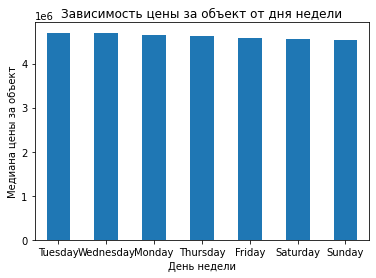

                        Mean  Count     Median
day_exposition                                
Tuesday         6.361485e+06   4164  4700000.0
Wednesday       6.407680e+06   3949  4700000.0
Monday          6.502076e+06   3598  4650000.0
Thursday        6.655063e+06   4276  4625000.0
Friday          6.367272e+06   3988  4577500.0
Saturday        6.920803e+06   1918  4550000.0
Sunday          6.232304e+06   1689  4530000.0


In [44]:
# Создаем сводную таблицу для данных о днях недели
day_exposition_pivot = data.pivot_table(index='day_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
day_exposition_pivot.columns = ['Mean', 'Count', 'Median']

# Сортируем данные по 'Медиане' в убывающем порядке
day_sorted_pivot = day_exposition_pivot.sort_values('Median', ascending=False)

# Создаем столбчатую диаграмму для 'Медианы'
day_sorted_pivot.plot(kind='bar', y='Median', legend=False, rot=0)

plt.title('Зависимость цены за объект от дня недели')
plt.xlabel('День недели')
plt.ylabel('Медиана цены за объект')
plt.show()

print(day_sorted_pivot)

День недели практически не влияет на цену за квадратный метр. Еще заметно что количество объявлений выше в будние дни.

*Изучим зависимость от месяца*

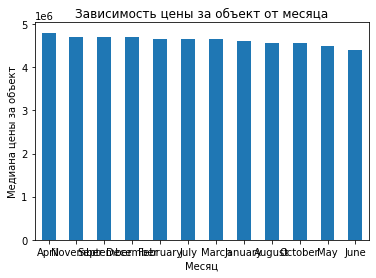

In [45]:
# Создаем сводную таблицу для данных о месяцах
month_exposition_pivot = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
month_exposition_pivot.columns = ['Mean', 'Count', 'Median']

# Сортируем данные по 'Медиане' в убывающем порядке
month_sorted_pivot = month_exposition_pivot.sort_values('Median', ascending=False)

# Создаем столбчатую диаграмму для 'Медианы'
month_sorted_pivot.plot(kind='bar', y='Median', legend=False, rot=0)

plt.title('Зависимость цены за объект от месяца')
plt.xlabel('Месяц')
plt.ylabel('Медиана цены за объект')
plt.show()

По месяцам самая низкая активность - в мае и июне, самая высокая - в апреле и августе.

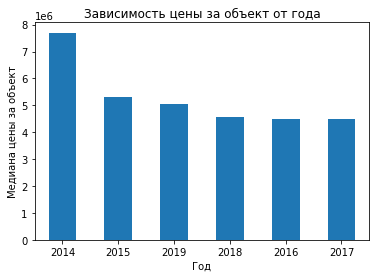

In [46]:
# Создаем сводную таблицу для данных о годах
year_exposition_pivot = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
year_exposition_pivot.columns = ['Mean', 'Count', 'Median']

# Сортируем данные по 'Медиане' в убывающем порядке
year_sorted_pivot = year_exposition_pivot.sort_values('Median', ascending=False)

# Создаем столбчатую диаграмму для 'Медианы'
year_sorted_pivot.plot(kind='bar', y='Median', legend=False, rot=0)

plt.title('Зависимость цены за объект от года')
plt.xlabel('Год')
plt.ylabel('Медиана цены за объект')
plt.show()

По годам самая низкая цена в 2016 году, самая высокая - в 2014.

Посмотрим зависимость цены за квадратный метр в зависимости от этажа

Как и следовало ожидать этажи расположеннные не на первом и не на последнем этажах стоят дороже и их больше, однако последние этажи дороже чем первые, что тоже логично потому что ниже риск краж, но и у последнего этажа есть минусы, например может протекать крыша.

**4.4 Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [47]:
data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'price_per_square_meter'), ascending=False)\
.head(10)\
.sort_values(('mean', 'price_per_square_meter'), ascending=False)

,count,mean,median
,price_per_square_meter,price_per_square_meter,price_per_square_meter
locality_name,,,
санкт-петербург,15621,114803.758206,104790.420
пушкин,369,103125.819377,100000.000
деревня кудрово,299,92473.547559,91860.470
поселок парголово,327,90175.913089,91642.860
поселок мурино,552,85629.568641,86059.295
поселок шушары,439,78551.344647,76829.270
колпино,337,75333.295816,74722.220
гатчина,307,68746.146515,67796.610


Из представленных населенных пунктов самая высокая стоимость в Санкт-Петербурге, а самая низкая в Выборге.

**4.5 Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.**

,price_per_square_meter
city_centers_nearest_km,
0.0,245833.530370
1.0,177362.980579
2.0,158581.337876
3.0,121299.021358
4.0,132829.545168
5.0,140869.562856
6.0,150290.154318
7.0,156176.879524
8.0,125073.007665


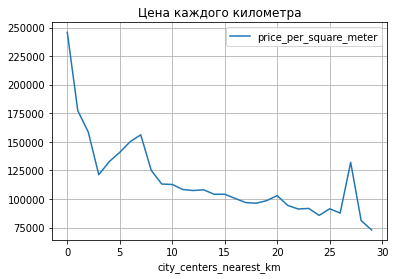

In [48]:
saint_petersburg_data = data[data['locality_name']=='санкт-петербург'] 
saint_petersburg__pivot = saint_petersburg_data.pivot_table(index='city_centers_nearest_km', values='price_per_square_meter')

saint_petersburg__pivot.plot(grid = True, title = 'Цена каждого километра')
saint_petersburg_data['city_centers_nearest_km'].corr(saint_petersburg_data['price_per_square_meter'])

saint_petersburg__pivot

Исходя из графика можно заметить, что цена резко снижается по мере удаленности в пределах 3 км от центра. Два пиковых значения за центром связаны скорей всего с благоприятными густонаселенными районами, которые не входят в центр. Например "Черная речка" статусный район расположенный за центром. Плюс Санкт-Петербург не Москва с ярко выраженным центром. 

### Общий вывод

**Была проанализирована Недвижимость Санкт-Петербурга за период с 2014 по 2019 год.**

**В ходе проекта была проделана следующая работа:**

1. Исследованы данные.
2. Проведена предобработка данных.
3. Добавлены столбца необходимые для анализа.
4. Проведен исследовательский анализ данных.

**По результатам анализа можно сделать следующие выводы:**

1. Основную долю рынка составляют 1-2 комнатные квартиры.
2. Наибольшее количество предложений в 5-этажных домах, а также в 8-этажных (что более применимо к центру Санкт-Петербурга).
3. Среднее время продажи квартиры 3 месяца.
4. Наиболее высокая за квадратный метр в квартирах расположенных в пределах 3 км от центра Санкт-Петербурга.
5. Средняя стоимость квартир 6,5 миллионов рублей. Cредний размер квартиры 60 кв. метров.
5. Самые дорогие квартиры в Санкт-Петербурге, самые дешевые в Выборге.

**Рекомендации для бизнеса:**

1. Проанализировать и улучшить систему обработки данных, а именно DWH, с целью минимизаций аномалий и пропущенных значений в исходных данных.
2. Изменить правила заполнения обязательных полей на сайте, также с целью исключить пропущенные значения. Поставить ограничение на максимальную высоту потолков, количества комнат.
3. Для Продуктовой команды: сделать для собственника квартиры "Рекомендованную цену" по цене на квартиру в зависимости от раннее указанных им данных.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения там, где это возможно
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему
- [X]  устранены неявные дубликаты в названиях населённых пунктов
- [X]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [X]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [X]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [X]  посчитано и добавлено в таблицу: месяц публикации объявления
- [X]  посчитано и добавлено в таблицу: год публикации объявления
- [X]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [X]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [X]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [X]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод